In [7]:
from body_matrix import infer
from body_matrix import load
from body_matrix import process
from body_matrix import measure
from body_matrix import draw

video, frame_counts, fps, sample_frame = load.video(
    "/Users/troydo42/Desktop/Raw_Vids/VID_20230102_171533~2.mp4",
    -90, 
    10
)


keypoints_model, keypoints_transform = load.keypoints_model("cpu")
selected_box, keypoints = infer.detect_main_target(
	sample_frame, "cpu", 0.8, keypoints_model, keypoints_transform
)


segment_model, segment_transform = load.segment_model("cpu")
mask, mask_image, bool_mask = infer.segment_selected_target(
	sample_frame, "cpu", selected_box, 0.99, segment_model, segment_transform
)


selected_kps = process.keypoints_filter(
    ['left_hip', 'right_hip', 'left_wrist', 'right_wrist'], 
    keypoints
)


segment_area = process.segmentation_area(
    sample_frame, 
    bool_mask
)

Found  3  person in the frame
Distances:  [116.82540893554688, 387.29962158203125, 102.10708618164062]
Areas:  [189653.60975672305, 186352.78930723667, 5685.894640479237]
FOCUSES:  [1623.3935021905709, 481.15923415062406, 55.68560276379319]
Select keypoint index 0
Found  2  person in the frame
[538.5346069335938, 918.1996459960938, 785.1971435546875, 1655.08642578125]
[530.0302124023438, 928.8980712890625, 791.62060546875, 1653.9002685546875]
[808.7095336914062, 886.6578369140625, 1052.3995361328125, 1639.5401611328125]
[530.0302124023438, 928.8980712890625, 791.62060546875, 1653.9002685546875]
[4.868611822800389, 271.2096994448412]
4.868611822800389 0


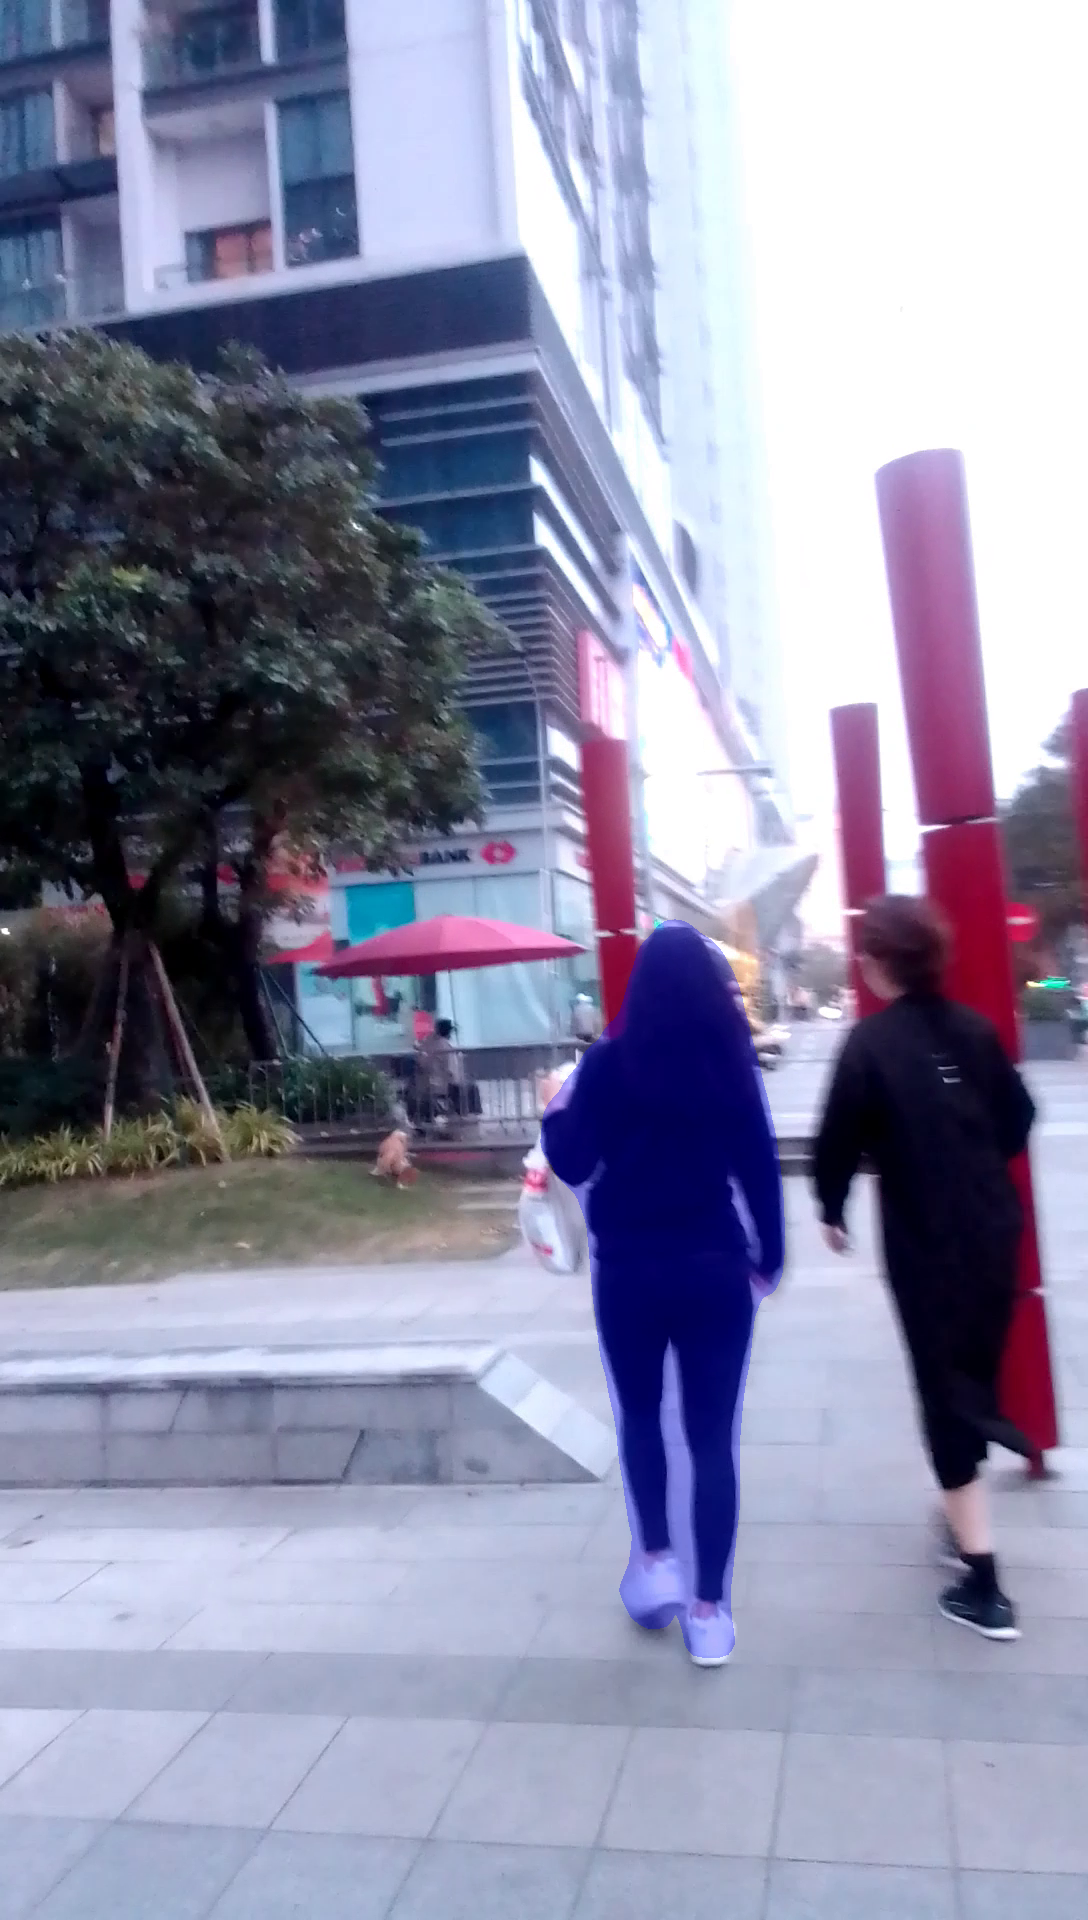

In [8]:
from torchvision.transforms.functional import pil_to_tensor, to_pil_image
from torchvision.utils import draw_segmentation_masks

segment_tensor_image = pil_to_tensor(sample_frame)
segment_mask_image = draw_segmentation_masks(
    segment_tensor_image, 
    bool_mask, 
    alpha=0.3, 
    colors=["blue"]    
)

segment_image = to_pil_image(segment_mask_image)
segment_image

In [9]:
selected_kps

{'left_wrist': [555.18310546875, 1106.5523681640625],
 'right_wrist': [769.3423461914062, 1251.840576171875],
 'left_hip': [629.9232788085938, 1269.1024169921875],
 'right_hip': [714.7245483398438, 1267.6640625]}

left_wrist [555.18310546875, 1106.5523681640625]
right_wrist [769.3423461914062, 1251.840576171875]
left_hip [629.9232788085938, 1269.1024169921875]
right_hip [714.7245483398438, 1267.6640625]


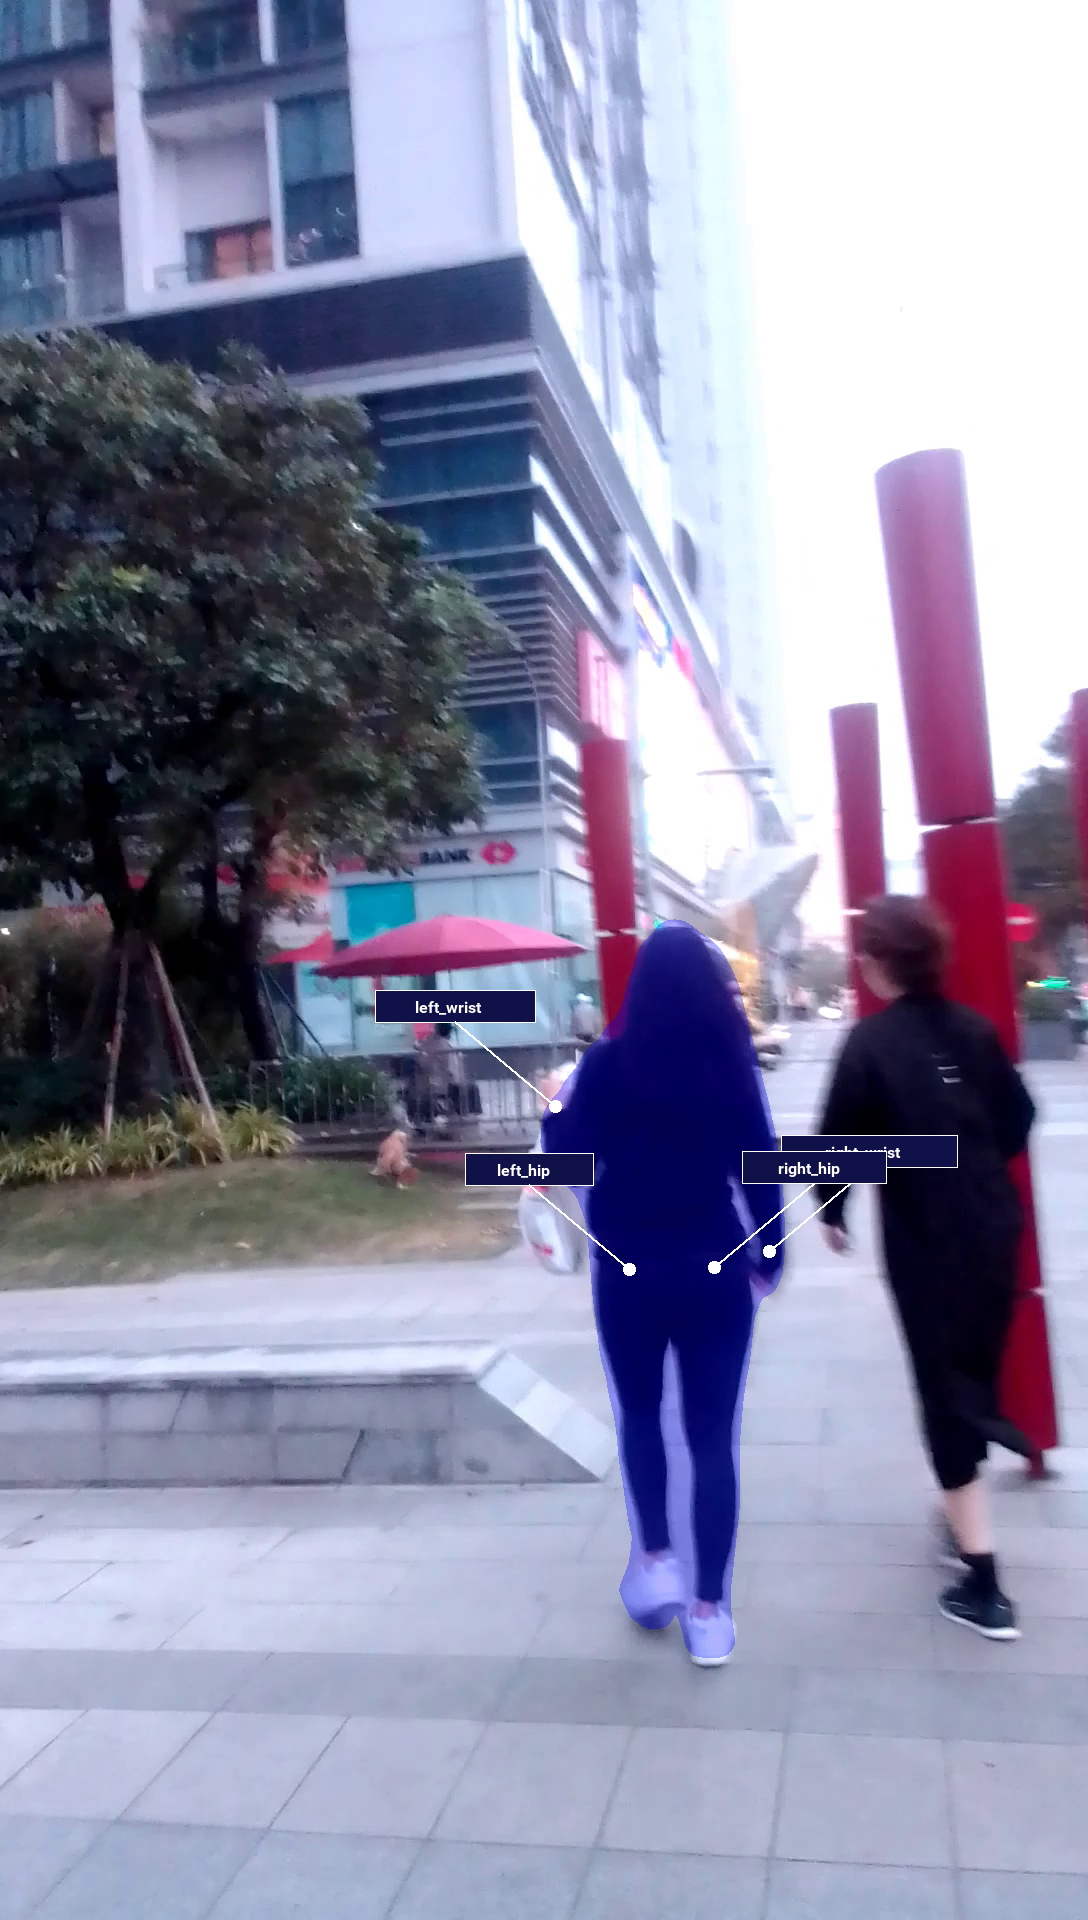

In [10]:
float_selected_frame = segment_image
middle_hip = measure.find_middle_point(
    selected_kps['left_hip'], 
    selected_kps['right_hip']
)

for key, value in selected_kps.items():
    print(key, value)
    
    float_selected_frame = draw.floating_rectangle_label(
        image = float_selected_frame, 
        longitude_coordinate = middle_hip[0], 
        point=value, 
        label_text=key, 
        label_size=16, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
    )
    
float_selected_frame

In [11]:
hip_kps = process.find_hip_points(
    selected_kps['left_hip'],
    selected_kps['right_hip'], 
    selected_kps['left_wrist'], 
    selected_kps['right_wrist'], 
    segment_area
)

hip_kps.update({
    "middle_hip": middle_hip    
})

hip_kps

low right hand {'left_hip': [590, 1269], 'right_hip': [754, 1266]} 
 Right Wrist:  [769.3423461914062, 1251.840576171875] 
 Right Hip:  [714.7245483398438, 1267.6640625]


{'left_hip': [590, 1269],
 'right_hip': [754, 1266],
 'middle_hip': (672.3239135742188, 1268.3832397460938)}

left_hip [590, 1269]
right_hip [754, 1266]
middle_hip (672.3239135742188, 1268.3832397460938)


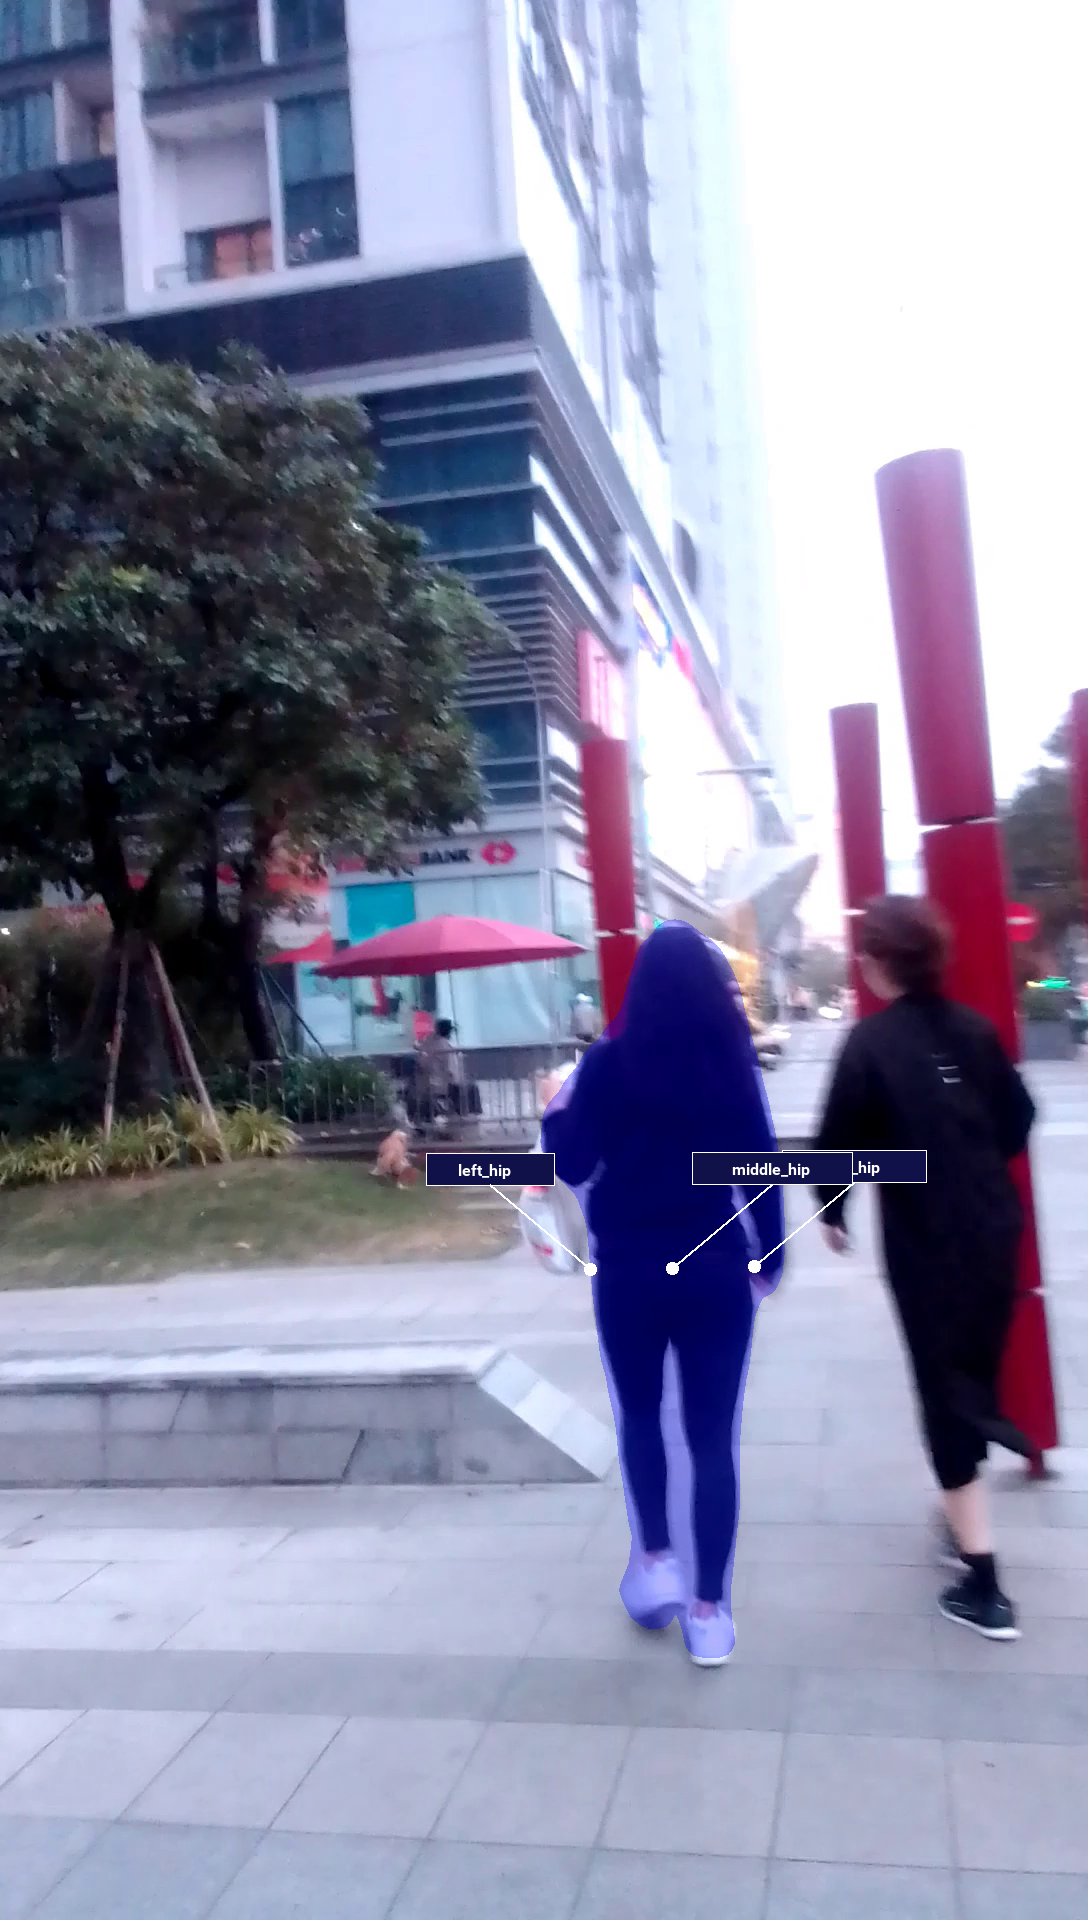

In [12]:
from body_matrix import measure
from body_matrix import draw


float_labeled_frame = segment_image
for key, value in hip_kps.items():
    print(key, value)
    float_labeled_frame = draw.floating_rectangle_label(
        image = float_labeled_frame, 
        longitude_coordinate = middle_hip[0], 
        point=value, 
        label_text=key, 
        label_size=16, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
    )    
        
        
float_labeled_frame 